{0: 'Primary Care'}


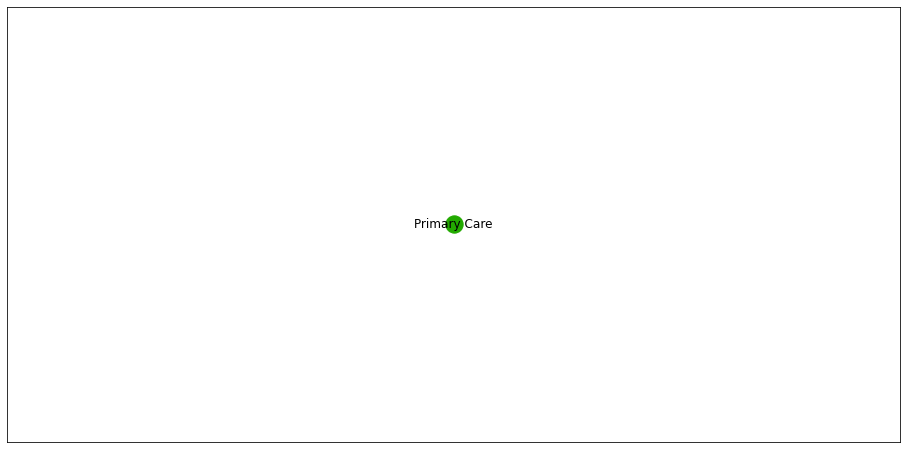

In [1]:
import networkx as nx
import numpy as np
from pyvis.network import Network
#from IPython.core.display import HTML
from IPython.display import display, HTML
from IPython.display import IFrame
from matplotlib  import pyplot as plt

def publish_graph(G, html_fn):
    nt = Network(directed = True)
    nt.from_nx(G)
    nt.save_graph(html_fn)
    return IFrame(src=html_fn, width=1000, height=600)

def save_graph(G, png_name):
    '''
    A way to  save an image of a graph G in to a file name png_name
    '''
    
    offset = 12
    pos_low = lambda x: (x[0]+offset,x[1]-offset)
    pos_node = nx.circular_layout(G)
    
    #
    
    pos_label = {k: pos_low(v) for k,v  in pos_node.items()}
    
    fig, ax =  plt.subplots(1,1, figsize = (16,8))
    labels =  {n:G.nodes()[n]['label']  for n in G.nodes()}
    print(labels)
    #
    
    nx.draw_networkx(G,with_labels = False, pos = pos_node, node_color = '#2A0',  ax = ax)
    #nx.draw_networkx_edges(G, pos = pos_node, arrowsize = 15, )

    nx.draw_networkx_labels(G,pos_node ,labels = labels ,font_size = 12, font_weight = 10,ax = ax)
   
    
    plt.savefig(png_name)
    

    
G = nx.DiGraph()
G.add_node(0, label = "Primary Care",size = 20)
save_graph(G, 'graph0.png')


In [2]:
G.nodes()[0]

{'label': 'Primary Care', 'size': 20}

#### ok, now lets add a few more services

{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery'}


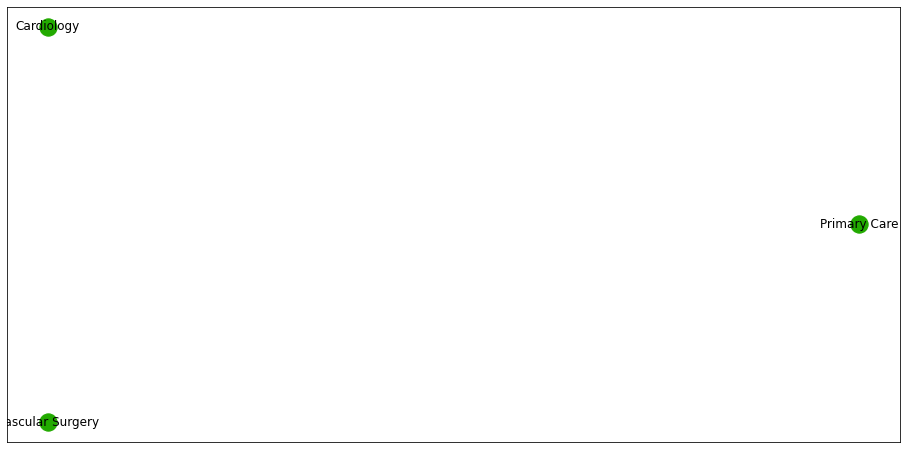

In [3]:
G.add_node(1, label = 'Cardiology', size = 20)
G.add_node(2, label = 'Vascular Surgery', size = 20)
save_graph(G, 'graph1.png')



In [4]:
#### now lets add a few more

{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery', 3: 'Podiatry Surgery', 4: 'Mental Health'}


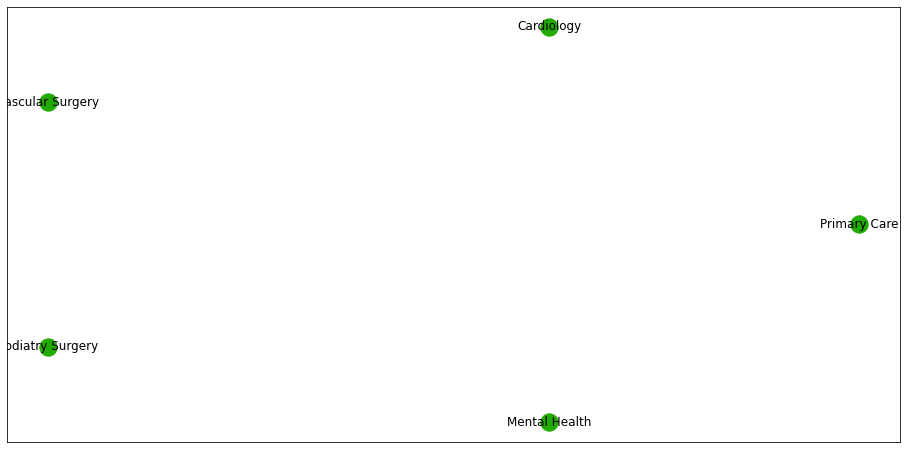

In [5]:
G.add_node(3, label = 'Podiatry Surgery', size = 20)
G.add_node(4, label = 'Mental Health', size = 20)
save_graph(G,'graph2.png')

Slide 1

In [6]:
### ok now lets see how a referral wound work out.


{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery', 3: 'Podiatry Surgery', 4: 'Mental Health'}


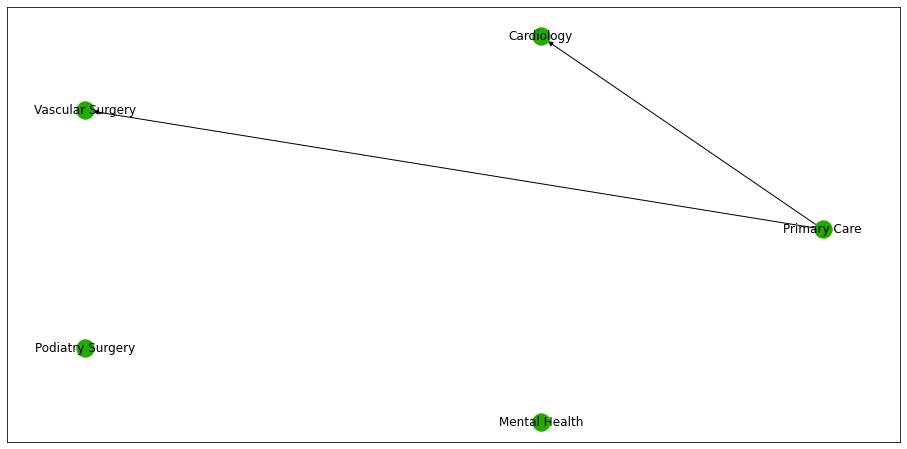

In [7]:
# add edges
G.add_edge(0,1)
G.add_edge(0,2)
save_graph(G,'graph3.png')

#### lets have  some  more edges 

Slide 2

{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery', 3: 'Podiatry Surgery', 4: 'Mental Health', 5: 'Social-Worker'}


"\nnt.from_nx(G)\n\nnt.save_graph('Nodes2.html')\n\n"

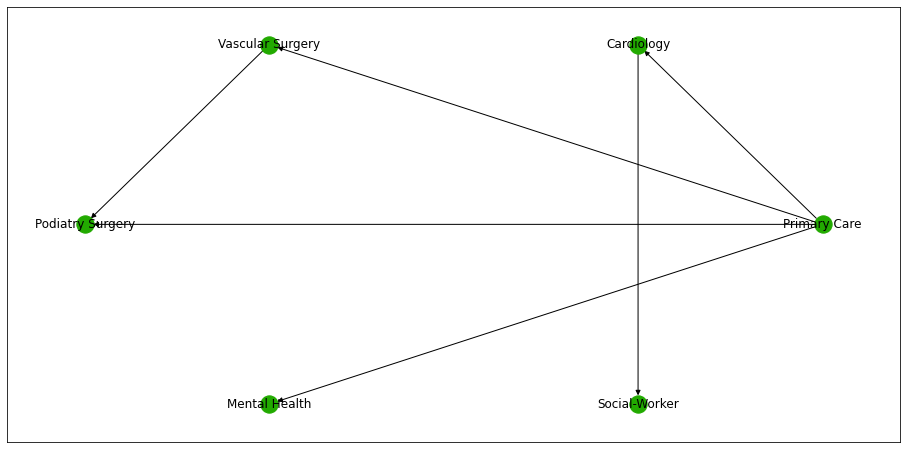

In [8]:
# add edges
G.add_node(5, label = 'Social-Worker', size = 20)
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(1,5)
G.add_edge(2,3)
save_graph(G, 'graph4.png')
# draw net
#nt = Network(directed = True)
# populates the nodes and edges data structures
#publish_graph(G, 'Node2.html')
'''
nt.from_nx(G)

nt.save_graph('Nodes2.html')

'''
#IFrame(src='./Nodes2.html', width=1000, height=600)

{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery', 3: 'Podiatry Surgery', 4: 'Mental Health', 5: 'Social-Worker', 6: 'Radiology'}


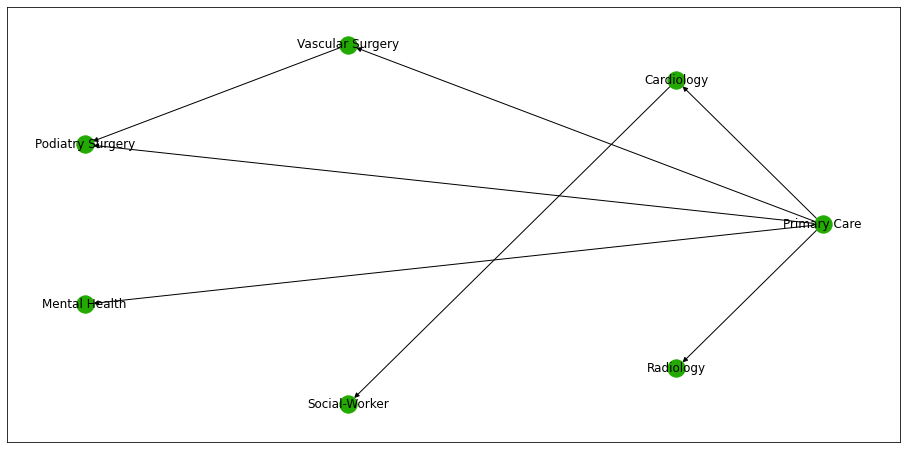

In [9]:
G.add_node(6, label= 'Radiology')
G.add_edge(0,4, weight = 3)
G.add_edge(0,6)
save_graph(G,'graph5.png')

In [10]:
# draw net

#nt = Network(directed = True)
# populates the nodes and edges data structures

#publish_graph(G,  'Node3.html')



#IFrame(src='./Nodes3.html', width=1000, height=600)


Slide 4

In [11]:
#IFrame(src='./chord612.html', width=1100, height=1100)

In [12]:
#cd ./TEDx_SimCon

In [13]:
cd ..


D:\ClinApp\Development\VHAMACBENARA\ORD_ConsultNetwork\ORD_ConsultNetwork


In [14]:
'''
from Utils.ORD_Visual import Visual
v= Visual()
sta = '612'
v.load_graph(v.graph_sta3n[sta])


G612 = nx.DiGraph()
es = [(i[1]['source'],i[1]['target'],i[1]['weight']) for i in v.df.iterrows()]
G612.add_weighted_edges_from(es)
nt612 = Network(directed = True)
nt612.from_nx(G612)
nt612.save_graph('Nodes5.html')
#pyvis_graph.show('Nodes5.html')
nt612.toggle_physics(False)
IFrame(src= 'Nodes5.html', width=800, height=1000)
    

'''

"\nfrom Utils.ORD_Visual import Visual\nv= Visual()\nsta = '612'\nv.load_graph(v.graph_sta3n[sta])\n\n\nG612 = nx.DiGraph()\nes = [(i[1]['source'],i[1]['target'],i[1]['weight']) for i in v.df.iterrows()]\nG612.add_weighted_edges_from(es)\nnt612 = Network(directed = True)\nnt612.from_nx(G612)\nnt612.save_graph('Nodes5.html')\n#pyvis_graph.show('Nodes5.html')\nnt612.toggle_physics(False)\nIFrame(src= 'Nodes5.html', width=800, height=1000)\n    \n\n"

{0: 'Primary Care', 1: 'Cardiology', 2: 'Vascular Surgery', 3: 'Podiatry Surgery', 4: 'Mental Health', 5: 'Social-Worker', 6: 'Radiology'}


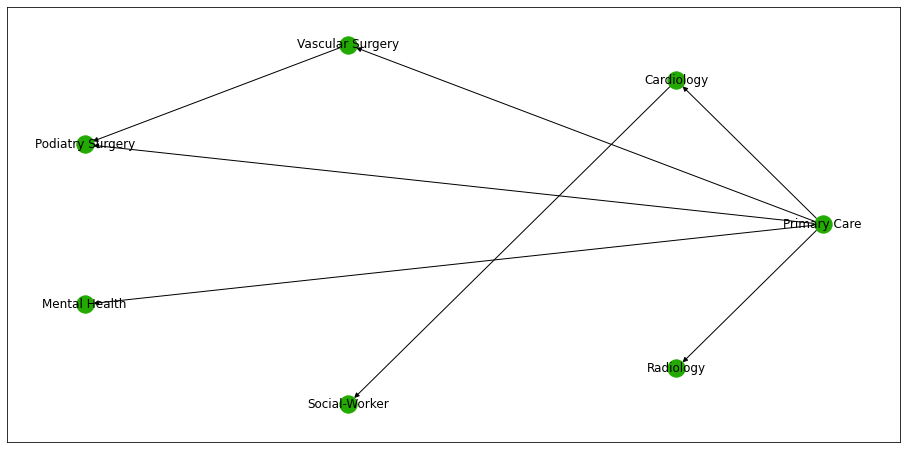

In [15]:
G.nodes()[2]['color'] = '#900'
G.nodes()[4]['color'] = '#900'
G.edges()[(2,3)]['weight'] = 10
save_graph(G, ' graph6.png')
#publish_graph(G, 'Node6.html')

### Slide 7 - Illustrative cartoon, look for the red nodes.

In [16]:
cd ..


D:\ClinApp\Development\VHAMACBENARA\ORD_ConsultNetwork


In [20]:
from d3blocks import D3Blocks
import pandas as pd
import Utils.ORD_ConsultUtils as u
from matplotlib import pyplot as plt, animation
import networkx as nx
import random
import numpy as np

class Visual:
    '''
    A set of method to render visualization for the project.
    '''
    def __init__(self):
        '''
        Instantiate the class
        '''
        self.d3 = D3Blocks()
        utils = u.ConsultUtils()
        self.graph_sta3n = utils.load_graph_iter()

    def load_graph(self, g):
        '''
        A method to load a graph into the class
        '''
        self.G = g
        es = lambda x,y : g.edges()[(x,y)]
        self.df = pd.DataFrame([[es(e0,e1)['sourceName'],es(e0,e1)['targetName'], es(e0,e1)['count']] for (e0,e1) in g.edges()],
            columns = ['source','target','weight'])


    def chord(self):
        '''
        Render a Chord graph  from data 
        '''
        self.d3.chord(self.df)

    def chord(self, title):
        '''
        plot a circualr chord graph for a given station

        '''
        #es = lambda x,y : g.edges()[(x,y)]
        #df = pd.DataFrame([[es(e0,e1)['sourceName'],es(e0,e1)['targetName'],
        #es(e0,e1)['count']] for (e0,e1) in g.edges()], columns =
        #['source','target','weight'])
        self.d3.chord(self.df, filepath = './notes/chord' + title + '.html',)
        
    def graph(self, title):
        '''
        plot a graph for a given networks
        '''
        self.d3.d3graph(self.df, filepath = './notes/chord' + title + '.html',)

    def demo_network_TEDx(self, N):
        '''
        A method to  demo a baby network, for the TEDx talk
        '''
        np.random.seed(seed = 123)
        plt.rcParams["figure.figsize"] = [7.50, 4.50]
        plt.rcParams["figure.autolayout"] = True

        fig, (ax0,ax1) = plt.subplots(1,2)
        
        G = nx.DiGraph()

        nodes = range(N)
        G.add_nodes_from(nodes)
        for n in nodes:
            G.nodes()[n]['account'] = Account(n)
            G.nodes()[n]['color'] = 'green'

        ax0.set_title('Network Activity')
        # ax1.set_title('Amount distribution')
        # ax1.set_xlabel('amount')
        # ax1.set_ylabel('frequency')
        

        #color_map = [G.nodes()[c]['color'] for c in G.nodes() ]
        pos = nx.circular_layout(G)
        #nx.draw_networkx(G,node_color = color_map, pos = pos, with_labels=True,ax = ax0)

        def animate(frame):
           #fig.clear()
           num1 = random.randint(0, N - 1)
           num2 = random.randint(0, N - 1)
           G.add_edges_from([(num1, num2)])
           G.nodes()[num1]['account'].reduce_amount()
           G.nodes()[num2]['account'].add_amount()
           #
           # change color
           #
           if (G.nodes()[num2]['account'].amount >= 25):
                G.nodes()[num2]['color'] = 'red'
           data = [G.nodes()[n]['account'].amount for n in G.nodes()]    
           size_map = [15*G.nodes()[n]['account'].amount for n in G.nodes()]
           color_map = [G.nodes()[c]['color'] for c in G.nodes() ]
           nx.draw_networkx(G, node_color = color_map, 
                            node_size = size_map, pos = pos, with_labels=True,ax = ax0)
           G.remove_edges_from([(num1,num2)])
           
           ax1.set_xticks(range(np.max(data)+1))
           
           ax1.hist(data, bins = 2*N , color = 'b')
           #color_map = [G.nodes()[c]['color'] for c in G.nodes() ]
           #nx.draw_networkx(G,pos = pos,node_color = color_map, with_labels=True,ax = ax0)
           

        ani = animation.FuncAnimation(fig, animate, frames=30, interval=250, repeat=False)

        #plt.show()
        return ani
    
    def demo_network(self,N):
        '''
        A method to demo the random edge creation for demo purposes
        '''
        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True

       

        fig, (ax0,ax1) = plt.subplots(1,2)
        
        G = nx.DiGraph()

        nodes = range(N)
        G.add_nodes_from(nodes)
        for n in nodes:
            G.nodes()[n]['account'] = Account(n)

        ax0.set_title('Network Activity')
        ax1.set_title('Amount distribution')
        ax1.set_xlabel('amount')
        ax1.set_ylabel('frequency')
        

        
        pos = nx.circular_layout(G)
        nx.draw_networkx(G,pos =pos, with_labels=True,ax = ax0)

        def animate(frame):
           #fig.clear()
           num1 = random.randint(0, N - 1)
           num2 = random.randint(0, N - 1)
           if (num1 != num2):
               G.add_edges_from([(num1, num2)])
               G.nodes()[num1]['account'].reduce_amount()
               G.nodes()[num2]['account'].add_amount()

           nx.draw_networkx(G,pos = pos, with_labels=True,ax = ax0)
           G.remove_edges_from([(num1,num2)])
           data = [G.nodes()[n]['account'].amount for n in G.nodes()]
           ax1.set_xticks(range(np.max(data)+1))
           
           ax1.hist(data, bins = 2*N , color = 'b')
           
           nx.draw_networkx(G,pos = pos, with_labels=True,ax = ax0)
           
          
           
           

        ani = animation.FuncAnimation(fig, animate, frames=30, interval=250, repeat=False)

        #plt.show()
        return ani


class Account():
    '''
    A small class to hold the account of transfers
    '''
    def __init__(self, id):
        '''
        Instantiate the agent
        '''
        self.amount = 20
        self.id = id


    def check_amount(self):
        '''
        method to check if can give money
        '''
        if self.amount > 0 :
            return True
        else:
            return False
   
    def add_amount(self):
        '''
        Add to the ammount
        '''
        
        self.amount +=2

    def reduce_amount(self):
        '''
        reduce amount 
        '''
        
        self.amount -=2


v = Visual()

#a= v.demo_network(10)
# show some images of Sta3n's networks
#v.load_graph(v.graph_sta3n['612'])
#v.chord(v.df, '612')


ModuleNotFoundError: No module named 'Utils'

In [ ]:
'''
v =Visual()
G = nx.DiGraph()
N=10
nodes = range(N)
G.add_nodes_from(nodes)
for n in nodes:
    G.nodes()[n]['account'] = Account(n)
    G.nodes()[n]['color'] = 'green'

'''


In [18]:
from IPython.display import HTML
import ffmpeg
v = Visual()
a = v.demo_network_TEDx(10)
HTML(a.to_jshtml()) 

NameError: name 'Visual' is not defined

In [ ]:
'''
from Utils.ORD_Visual import Visual
from IPython.display import HTML
import ffmpeg
v = Visual()
a = v.demo_network(10)
HTML(a.to_jshtml()) 
'''

In [ ]:
#cd  .\TEDx_SimCon

## Slide 8 - Setting up monitring

### Ok, so we get the idea of how this thing is going to work. Next we need to be able to follow the mechanics of whats happening 
### as this thing is working
### We are interested in:
 * count of patients in the queue
 * count of clinis that are in overflow. We can determine the cut off.

## Slide 9 - Off to the races, how does this look?
#### there is only one way to see really. Lets run it.

In [ ]:
Slide 10 -rate correction.

In [ ]:
Slide 11 -  Putting it together

In [ ]:
Slide 12 -  Did I convince you.